## Task 1  :- Classification on Credit-g  Dataset



### Loading required Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from scipy.io import arff



%matplotlib inline

In [44]:
# ml liberaries

from sklearn.model_selection import train_test_split,cross_validate

from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
credit_data_from_file = arff.loadarff('credit-g.arff')

In [4]:
credit_df = pd.DataFrame(credit_data_from_file[0])

In [5]:
# apply decoding from binary to UTF-8


credit_df = credit_df.apply(lambda x: x.str.decode("utf-8") if x.dtype == object else x)


#### 1.1  Determine which features are continuous and which are categorical.

In [6]:
credit_df.describe(include='all')

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,2
top,no checking,NaN,existing paid,radio/tv,NaN,<100,1<=X<4,NaN,male single,none,...,car,NaN,none,own,NaN,skilled,NaN,none,yes,good
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,NaN,596,963,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN


In [7]:
credit_df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
checking_status,<0,0<=X<200,no checking,<0,<0,no checking,no checking,0<=X<200,no checking,0<=X<200,...,no checking,no checking,<0,<0,no checking,no checking,<0,no checking,<0,0<=X<200
duration,6.0,48.0,12.0,42.0,24.0,36.0,24.0,36.0,12.0,30.0,...,12.0,15.0,18.0,36.0,12.0,12.0,30.0,12.0,45.0,45.0
credit_history,critical/other existing credit,existing paid,critical/other existing credit,existing paid,delayed previously,existing paid,existing paid,existing paid,existing paid,critical/other existing credit,...,critical/other existing credit,all paid,existing paid,existing paid,existing paid,existing paid,existing paid,existing paid,existing paid,critical/other existing credit
purpose,radio/tv,radio/tv,education,furniture/equipment,new car,education,furniture/equipment,used car,radio/tv,new car,...,education,radio/tv,radio/tv,furniture/equipment,new car,furniture/equipment,used car,radio/tv,radio/tv,used car
credit_amount,1169.0,5951.0,2096.0,7882.0,4870.0,9055.0,2835.0,6948.0,3059.0,5234.0,...,3565.0,1569.0,1936.0,3959.0,2390.0,1736.0,3857.0,804.0,1845.0,4576.0
savings_status,no known savings,<100,<100,<100,<100,no known savings,500<=X<1000,<100,>=1000,<100,...,no known savings,100<=X<500,no known savings,<100,no known savings,<100,<100,<100,<100,100<=X<500
employment,>=7,1<=X<4,4<=X<7,4<=X<7,1<=X<4,1<=X<4,>=7,1<=X<4,4<=X<7,unemployed,...,<1,>=7,4<=X<7,unemployed,>=7,4<=X<7,1<=X<4,>=7,1<=X<4,unemployed
installment_commitment,4.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,4.0,...,2.0,4.0,2.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0
personal_status,male single,female div/dep/mar,male single,male single,male single,male single,male single,male single,male div/sep,male mar/wid,...,male single,male single,male mar/wid,male single,male single,female div/dep/mar,male div/sep,male single,male single,male single
other_parties,none,none,none,guarantor,none,none,none,none,none,none,...,none,none,none,none,none,none,none,none,none,none


In [8]:
continues_feature = [
    'duration',
    'credit_amount',
    'installment_commitment',
    'residence_since',
    'age',
    'existing_credits',
    'num_dependents'
]

categorical_feature = [
    
    'checking_status',
    'credit_history',
    'purpose',
    'savings_status',
    'employment',
    'personal_status',
    'other_parties',
    'property_magnitude',
    'other_payment_plans',
    'housing',
    'job',
    'own_telephone',
    'foreign_worker'
    
    
]

In [9]:
# checking misssing values

credit_df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

#### 1.2 Visualize the univariate distribution of each continuous  feature, and the distribution of the target.


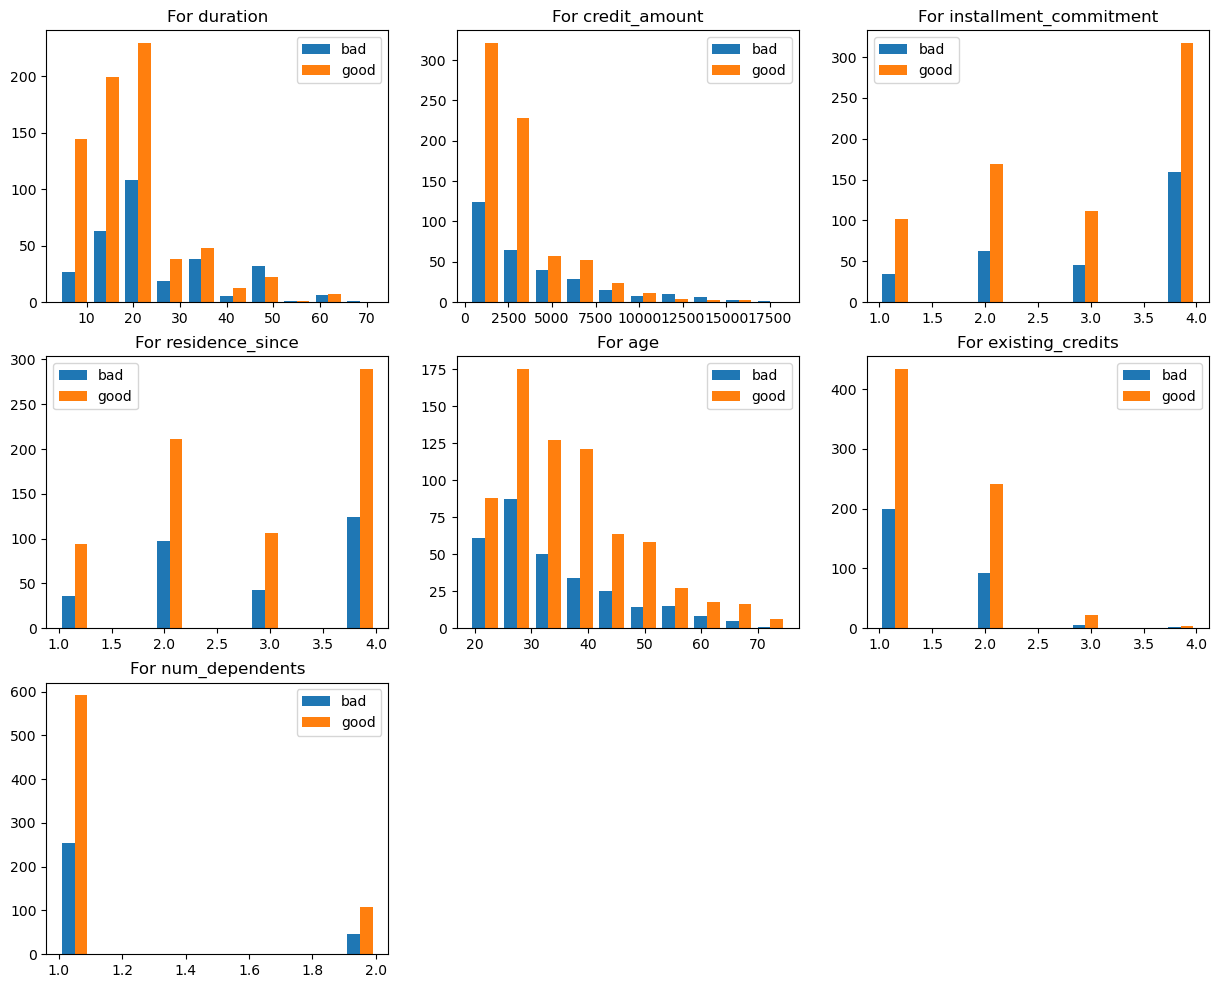

In [10]:
plt.figure(figsize=(15,12))


for index,column in enumerate(continues_feature):
#     print(column)
    ax = plt.subplot(3,3,index+1)
    ax.set_title(f'For {column}')
    d = credit_df.pivot(columns='class',values=column)
    ax.hist(d)
    ax.legend(['bad','good'])
    
    
    

#### 1.3 Split data into training and test set. Do not use the test set until a final evaluation in 1.5.
Preprocess the data (such as treatment of categorical variables) without using a pipeline and
evaluate an initial LogisticRegression model with an training/validation split.

In [11]:
train_df,test_df = train_test_split(credit_df,test_size=0.20,random_state=145)

X_train,y_train = train_df.drop(columns='class').copy(), train_df['class'].copy()

X_test,y_test = test_df.drop(columns='class').copy(), test_df['class'].copy()

In [12]:
train_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
122,no checking,12.0,existing paid,furniture/equipment,1768.0,<100,1<=X<4,3.0,male single,none,...,real estate,24.0,none,rent,1.0,unskilled resident,1.0,none,yes,good
990,no checking,12.0,critical/other existing credit,education,3565.0,no known savings,<1,2.0,male single,none,...,life insurance,37.0,none,own,2.0,unskilled resident,2.0,none,yes,good
927,<0,48.0,existing paid,used car,10297.0,<100,4<=X<7,4.0,male single,none,...,no known property,39.0,stores,for free,3.0,skilled,2.0,yes,yes,bad
551,no checking,6.0,all paid,radio/tv,1750.0,500<=X<1000,>=7,2.0,male single,none,...,life insurance,45.0,bank,own,1.0,unskilled resident,2.0,none,yes,good
628,no checking,42.0,critical/other existing credit,furniture/equipment,4042.0,500<=X<1000,1<=X<4,4.0,male single,none,...,real estate,36.0,none,own,2.0,skilled,1.0,yes,yes,good


preprocessing steps

In [13]:
credit_df[categorical_feature].describe()

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,no checking,existing paid,radio/tv,<100,1<=X<4,male single,none,car,none,own,skilled,none,yes
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


In [14]:
scalling_feats = continues_feature

binary_feats = ['own_telephone','foreign_worker']

categorical_feats = categorical_feature 

In [30]:
c_transformer_1 = make_column_transformer(
    (OneHotEncoder(drop='if_binary'),binary_feats),
    (OneHotEncoder(),categorical_feats),
    ('passthrough',scalling_feats)
)

In [32]:
# Logistic regression 

X_train_1,X_val,y_train_1,y_val = train_test_split(X_train,y_train,test_size=0.30,random_state=1092)

In [35]:
#model initialization
lsr_model = LogisticRegression()

# tranformation
X_train_1_tr = c_transformer_1.fit_transform(X_train_1)

# model training
lsr_model.fit(X_train_1_tr,y_train_1)

# model validation 
X_val_tr = c_transformer_1.transform(X_val)

# model scoring
score = lsr_model.score(X_val_tr,y_val)

print("Accuracy score for Logistic regression is :- ",score)

Accuracy score for Logistic regression is :-  0.7625


C:\Users\JENIL\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
models = {
    'lsr' : LogisticRegression(),
    'svm' : SVC(),
    'knn': KNeighborsClassifier()
}

In [36]:
c_transformer = make_column_transformer(
    (StandardScaler(),scalling_feats),
    (OneHotEncoder(drop='if_binary'),binary_feats),
    (OneHotEncoder(),categorical_feats)
)

In [46]:
result_dict = {
    'model':[],
    'train_score':[],
    'test_score':[]
}

for m in models:
    pipe = make_pipeline(c_transformer,models[m])
    result = cross_validate(pipe,X_train,y_train,return_train_score=True)
    result_dict['model'].append(m)
    result_dict['train_score'].append(result['train_score'].mean())
    result_dict['test_score'].append(result['test_score'].mean())
    
    

C:\Users\JENIL\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\JENIL\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi